# LAB 3 - Matheus Gomes Maia
## ATIVIDADE
* 1 Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia. É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório anterior (por exemplo, tratamento de maiúsculas/minúsculas e strings numéricas) (5 pts).
* 2 Refaça a questão 2 do Laboratório anterior usando os tokens produzidos (5 pts).
* 3 Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos. (5 pts).
* 4 Refaça a questão 3 do Laboratório anterior usando os tokens stemizados. Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais? (10 pts.)


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re
from scipy.optimize import minimize_scalar
import seaborn as sns
pd.set_option("display.max_rows",40)

%matplotlib inline
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/maia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1 Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia. É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório anterior (por exemplo, tratamento de maiúsculas/minúsculas e strings numéricas) (5 pts).

#### Na atividade anterior eu utilizei a minha base, nessa vou utilizar a disponibilizada. Para fazer algo diferente e também porque a minha tinha duplicatas.

### Etapas feitas:
* Carregar csv
* Utilizar a função de tokenização do nltk.word_tokenize
* Filtrar palavras com digitos e com tamanho menor que 3
* Transformar tudo para minúsculas

In [10]:

data = pd.read_csv('../results_fornecida.csv')
data = data.drop_duplicates(subset='url', keep='last')


#Pre process news
# Tokenize, Join and Filter
# Words into a new data Frame
txt = [str(news) for news in data["text"].tolist()]
words = [nltk.word_tokenize(sentence) for sentence in txt]
words = [item for sublist in words for item in sublist] 
words = [word.lower() for word in words if (word.isalpha() and len(word)) > 2] 

# New Data frame with Word, Frequency and Ranking columns 
words_df = pd.DataFrame(words, columns=['word']) #All words
word_counts = words_df.word.value_counts().reset_index() #Join by word. Adds Frequency
word_counts.columns = ['Word', 'Freq'] #Naming columns 
word_counts['word_rank'] = word_counts.Freq.rank(ascending=False) #Adds ranking

## 2  Refaça a questão 2 do Laboratório anterior usando os tokens produzidos (5 pts).

In [19]:
total_words = len(words)
# Prob = Frequency/Total of words
word_counts['Prob. Per cent'] = (word_counts.Freq/total_words)*100
word_counts['Prob'] = word_counts.Freq/total_words

pd.set_option("display.max_rows",100)
print(word_counts[word_counts['word_rank'] <= 50])
pd.set_option("display.max_rows",40)

          Word  Freq  word_rank  Prob. Per cent      Prob
0          que  6549        1.0        4.378405  0.043784
1         para  2301        2.0        1.538359  0.015384
2          uma  2201        3.0        1.471503  0.014715
3          com  2171        4.0        1.451446  0.014514
4          não  2023        5.0        1.352499  0.013525
5          por  1336        6.0        0.893197  0.008932
6         como  1310        7.0        0.875815  0.008758
7         mais  1199        8.0        0.801605  0.008016
8          dos  1061        9.0        0.709343  0.007093
9          mas   939       10.0        0.627779  0.006278
10         sua   806       11.0        0.538860  0.005389
11         foi   755       12.0        0.504763  0.005048
12         das   711       13.0        0.475347  0.004753
13         seu   699       14.0        0.467324  0.004673
14        anos   574       15.0        0.383754  0.003838
15         ser   504       16.0        0.336955  0.003370
16      também

## 3 Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos. (5 pts).

In [71]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
steam_words_dict = {}
for word in word_counts.Word:
    stem = stemmer.stem(word)
    steam_words_dict.setdefault(stem, []).append(word)
teste= (sorted(steam_words_dict, key=lambda k: len(steam_words_dict[k]), reverse=True))

In [66]:
# Experimentos para achar FN e FP
'''
for top in range(50):
    print(teste[top],steam_words_dict[teste[top]])
print("-----------------------")
for key in sorted(steam_words_dict.keys()):
    print("%s: %s" % (key, steam_words_dict[key]))'''

'\nfor top in range(50):\n    print(teste[top],steam_words_dict[teste[top]])\nprint("-----------------------")\nfor key in sorted(steam_words_dict.keys()):\n    print("%s: %s" % (key, steam_words_dict[key]))'

### Exemplos de Falsos Positivos e Negativos--

> ## Falsos Positivos. Palavras que não deveriam estar juntas:
* autor ['autor', 'autores', **'autorize'**, 'autoral'] 
* universidad ['universidade', 'universidades', 'universidad']
* orient ['oriental', **'orientou'**, 'oriente']
* super ['superou', 'supere', **'super'**]

***

> ## Falsos Negativos. Palavras que deveriam estar juntas:
* aberta: ['aberta', 'abertas']
* abertament: ['abertamente']
* abord: ['aborde', 'abordou']
* aborda: ['aborda']
* abordada: ['abordadas']
* abordado: ['abordado', 'abordados']
* abrimo: ['abrimos']
* abrindo: ['abrindo']
* abrir: ['abrir']
* abriram: ['abriram']
* abririam: ['abririam']
* abrirá: ['abrirá']
* teórica: ['teórica']
* teórico: ['teórico', 'teóricos']

### Falsos positivos e negativos prejudicam as consultas
> ## Falsos postitivos
* Ao pesquisar por X termos semãnticamente diferentes de X vão aparecer na consulta.
* Exemplo: Pesquisar por autor de um livro X e receber na consulta uma página sobre autorização da distribuição do livro em universidades
***
> ## Falsos negativos
* Ao pesquisar por X termos semãnticamente semelhantes ao de X não vão aparecer na consulta.
* Exemplo: Pesquisar por "física teórica" e não receber páginas sobre os físicos teróricos.

## 4 Refaça a questão 3 do Laboratório anterior usando os tokens stemizados. Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais? (10 pts.)

In [75]:
steam_words_list = []
for word in words:
    stem = stemmer.stem(word)
    steam_words_list.append(stem)
    
stem_df = pd.DataFrame(steam_words_list, columns=['stem'])
# New Data Frame with stem, frequency and ranking
stem_counts = stem_df.stem.value_counts().reset_index()
stem_counts.columns = ['stem', 'Freq']
stem_counts['stem_rank'] = stem_counts.Freq.rank(ascending=False)
total_stem = len(stem_counts.index)
stem_counts['Prob'] = stem_counts.Freq/total_stem


In [80]:
#Find best C usig only mean
word_counts['rPr'] = (word_counts.word_rank*word_counts.Prob)
stem_counts['rPr'] = (stem_counts.stem_rank*stem_counts.Prob)


word_counts['C'] = np.mean(word_counts.rPr) / word_counts.Prob
stem_counts['C'] = np.mean(stem_counts.rPr) / stem_counts.Prob


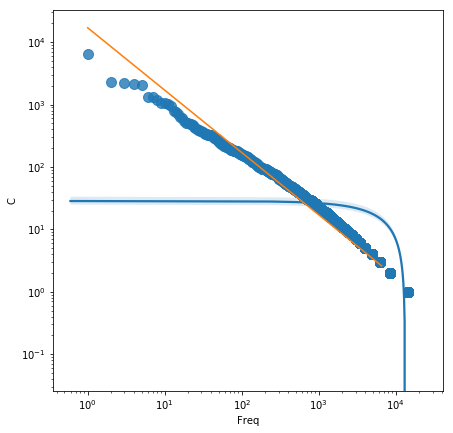

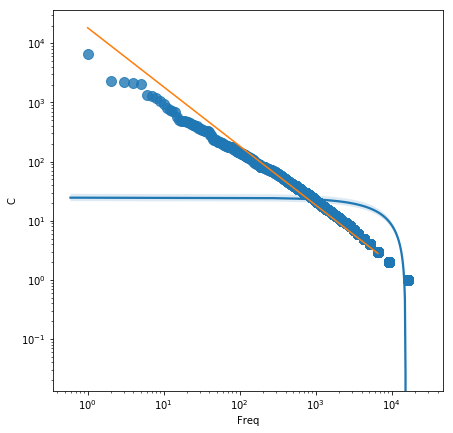

In [83]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("stem_rank", "Freq", stem_counts, ax=ax, scatter_kws={"s": 100})
sns.lineplot(stem_counts['Freq'], stem_counts['C'])

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("word_rank", "Freq", word_counts, ax=ax, scatter_kws={"s": 100})
sns.lineplot(word_counts['Freq'], word_counts['C'])


A diferença nos gráficos é minima.